In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("D:\sample_dataset.csv")
print("Training Set:"% train.columns, train.shape, len(train))


Training Set: (27025, 8) 27025


In [3]:
    
    train.head()

,tweet,hate,userID,likes,comments,views,shares,tags
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,9CAA8AE2,712,183,283,246,23
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1069B853,856,828,625,1,5
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,F4468A56,59,150,778,45,90
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,978BF9DB,183,752,1473,460,87
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,2AAE69DE,232,453,438,634,6


In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [5]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|(\d)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|https?.+?", "", elem)) 
    df[text_field] = df[text_field].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
    return df
#test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

In [6]:
train_clean

,tweet,hate,userID,likes,comments,views,shares,tags
0,rt woman shouldnt complain cleaning house amp ...,0,9CAA8AE2,712,183,283,246,23
1,rt boy dats coldtyga dwn bad cuffin dat hoe st...,0,1069B853,856,828,625,1,5
2,rt dawg rt ever fuck bitch start cry confused ...,0,F4468A56,59,150,778,45,90
3,rt ganderson based look like tranny,0,978BF9DB,183,752,1473,460,87
4,rt shit hear might true might faker bitch told ya,1,2AAE69DE,232,453,438,634,6
...,...,...,...,...,...,...,...,...
27020,lady banned kentucky mall jcpenny kentucky,1,CD5E4ACA,160,216,12,57,3
27021,omfg im offended im mailbox im proud mailboxpr...,1,278DDC3F,195,209,392,20,42
27022,dont balls hashtag say weasel away lumpy tony ...,1,1EBA1F62,85,209,316,29,25
27023,makes ask anybody god oh thank god,1,B1D808FC,31,29,288,30,32


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

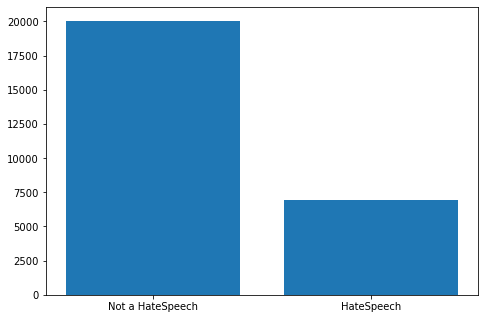

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_clean[train_clean.hate==0]),len(train_clean[train_clean.hate==1])]
ax.bar(langs,data)
plt.show()

In [10]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.hate==0]
train_minority = train_clean[train_clean.hate==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['hate'].value_counts()

1    20070
0    20070
Name: hate, dtype: int64

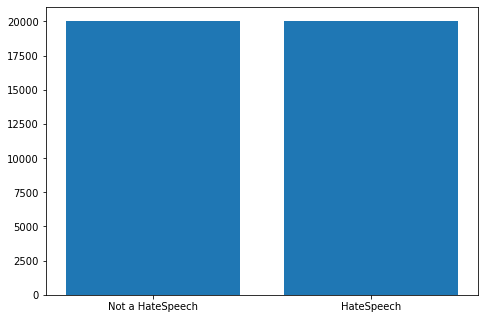

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.hate==0]),len(train_upsampled[train_upsampled.hate==1])]
ax.bar(langs,data)
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 5))),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['hate'],test_size=0.15,random_state = 3)

In [14]:
modelsgd = pipeline_sgd.fit(X_train, y_train)
y_predictsgd = modelsgd.predict(X_test)



In [15]:
from joblib import dump, load

In [16]:
dump(modelsgd, 'modelSGD.joblib') 

['modelSGD.joblib']

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predictsgd)

0.7945445007868509

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictsgd)

0.8048496927420694

In [19]:
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 6))), #change to 7
    ('tfidf',  TfidfTransformer()),
    ('nb', SVC(kernel='linear')),])

In [20]:
modelsvc = pipeline_svc.fit(X_train, y_train)


In [21]:
y_predictsvc = modelsvc.predict(X_test)

In [22]:
f1_score(y_test, y_predictsvc)

0.8961290322580645

In [23]:
import pandas as pd
test_dataset = pd.read_csv("D:\\Testfile.csv")

In [24]:
from joblib import load
modelsgd=load('modelSGD.joblib')
model_predict=modelsgd.predict(test_dataset["tweet"])

In [25]:
model_predict

array([0, 0, 1], dtype=int64)

In [ ]:
dump(modelsvc, 'modelSVC.joblib') 

In [ ]:

y_predict = modelsvc.predict(X_test)


In [ ]:
f1_score(y_test, y_predict)

In [26]:
from xgboost import XGBClassifier


In [27]:
pipeline_xgbc = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 7))),
    ('tfidf',  TfidfTransformer()),
    ('xgbc', XGBClassifier(learning_rate=1.0,max_depth=35,use_label_encoder=False)),])
# xgbc= XGBClassifier(learning_rate=0.3,max_depth=5,objective= 'binary:logistic')


In [28]:
modelxgbc = pipeline_xgbc.fit(X_train, y_train)

#modelxgbc.fit(X_train, y_train)

[12:44:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
yxgbc_predict=modelxgbc.predict(X_test)

In [30]:
f1_score(y_test, yxgbc_predict)

0.862244112667385

In [31]:
from sklearn.ensemble import VotingClassifier


In [32]:
voting = VotingClassifier(
    estimators=[('sgdclassifier', modelsgd), ('svcclassifier', modelsvc), ('xgbclassifier', modelxgbc)],
    voting='hard')

In [33]:
voting.fit(X_train, y_train)

[12:53:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('sgdclassifier',
                              Pipeline(steps=[('vect',
                                               CountVectorizer(ngram_range=(1,
                                                                            5))),
                                              ('tfidf', TfidfTransformer()),
                                              ('nb', SGDClassifier())])),
                             ('svcclassifier',
                              Pipeline(steps=[('vect',
                                               CountVectorizer(ngram_range=(1,
                                                                            6))),
                                              ('tfidf', TfidfTransformer()),
                                              ('nb', SVC(kernel='linear'))])),
                             ('xgbclassifier',
                              Pipeline(steps=[('vect',
                                               CountVector...
   

In [34]:
yvoting_predict=voting.predict(X_test)

In [35]:
f1_score(y_test, yvoting_predict)

0.8895000808930592

In [42]:
y_predictsvc=modelsvc.predict(["government should not remove this attrocity rules"])

In [43]:
if y_predictsvc[0]==1:
    print("it is an hate content")
else :
    print("it is not an hate content")

it is an hate content
